In [1]:
import tensorflow as tf

In [2]:
a = tf.constant(3.0)
b = tf.constant(4.0)
c= tf.sqrt(a**2 + b**2)
print(c)

tf.Tensor(5.0, shape=(), dtype=float32)


In [3]:
print(f"c: {c}")

c: 5.0


# 2nd- dimension

In [4]:
x = tf.constant([1,2,3])
y = tf.constant([4,5,6])
z = tf.tensordot(x, y, axes=[0,0])
print(f"c: {z}")

c: 32


In [5]:
p = tf.constant([[1,2],[3,4]])
q = tf.constant(1)
r = p + q
print(f"r: {r}")

r: [[2 3]
 [4 5]]


In [6]:
p = tf.constant([[1,2],[3,4]])
q = tf.constant([[5,6],[5,8]])
r = p * q
print(f"r: {r}")

r: [[ 5 12]
 [15 32]]


In [7]:
r.shape

TensorShape([2, 2])

# String

In [8]:
tf_string = tf.constant("TensorFlow")
tf_string

<tf.Tensor: shape=(), dtype=string, numpy=b'TensorFlow'>

In [9]:
tf.strings.length(tf_string)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [10]:
tf.strings.unicode_decode(tf_string, "UTF8")

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 84, 101, 110, 115, 111, 114,  70, 108, 111, 119])>

In [11]:
tf_string_array = tf.constant(["Deep Learning", "TensorFlow", "PYTORCH"])

In [12]:
#How to iterate through the TF string array
for string in tf_string_array:
  print(string)

tf.Tensor(b'Deep Learning', shape=(), dtype=string)
tf.Tensor(b'TensorFlow', shape=(), dtype=string)
tf.Tensor(b'PYTORCH', shape=(), dtype=string)


# VARIABLE VS CONSTANT

In [13]:
tf2_variable = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
tf2_variable

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [14]:
tf2_variable[0, 2].assign(100)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1.,   2., 100.],
       [  4.,   5.,   6.]], dtype=float32)>

In [15]:
tf2_constant = tf.constant([[1., 2., 3.], [4., 5., 6.]])
tf2_constant

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [16]:
#ERROR ! CANT ASSIGN ON CONSTANT
tf2_constant[0, 2].assign(100)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

# VARIABLES AND GRADIENT TAPE

In [17]:
w = tf.Variable(5.)

def get_loss(w):
    return w**2
def get_grad(w):
    with tf.GradientTape() as tape:
        L = get_loss(w)
    g = tape.gradient(L, w)
    return g
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
losses = []
for i in range(50):
    g = get_grad(w)
    optimizer.apply_gradients(zip([g], [w]))
    losses.append(get_loss(w))

Final loss: 5.0925916816879635e-09


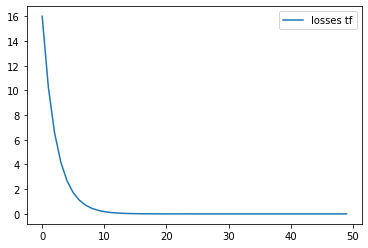

In [18]:
import matplotlib.pyplot as plt
plt.plot(losses, label='losses tf')
plt.legend()
print(f"Final loss: {get_loss(w)}")